In [42]:
%matplotlib inline

# Notebook zum Rumspielen #

## Verteilung der z-scores plotten

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn.preprocessing import normalize

import helper

Deutsches Beispielkorpus einlesen:

In [44]:
terms, documents, matrix = helper.read_csv("/home/ccl/tsproisl/Dokumente/Arbeit/kallimachos/authorship/data/delta_corpus_DE.csv")
authors = helper.extract_authors_from_document_names(documents)

Wir entfernen alle Terme, die in weniger als zwei Dokumenten vorkommen und wandeln die absoluten Häufigkeiten in relative um:

In [45]:
matrix, terms = helper.transform_to_relative_frequency(matrix, terms, min_df=2)

Wir wollen nur die 1000 häufigsten Terme und wir wollen die Merkmale standardisieren (z-scores):

In [46]:
matrix, terms = helper.select_most_frequent(matrix, terms, 1000)
z_scores = scipy.stats.zscore(matrix, axis=0, ddof=1)

Wir plotten ein Histogramm der Merkmale eines Dokuments und legen die entsprechende Normalverteilung darüber:

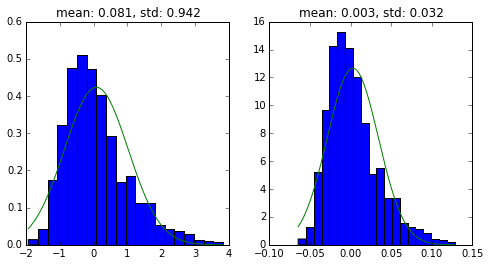

In [81]:
sorted_z_scores = np.sort(z_scores[0])
fit = scipy.stats.norm.pdf(sorted_z_scores, np.mean(sorted_z_scores), np.std(sorted_z_scores))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.hist(sorted_z_scores, bins=20, normed=True)
ax1.plot(sorted_z_scores, fit)
ax1.set_title("mean: %.3f, std: %.3f" % (np.mean(sorted_z_scores), np.std(sorted_z_scores)))
normalized_features = np.sort(normalize(sorted_z_scores, norm="l2")[0])
fit_normalized = scipy.stats.norm.pdf(normalized_features, np.mean(normalized_features), np.std(normalized_features))
ax2.hist(normalized_features, bins=20, normed=True)
ax2.plot(normalized_features, fit_normalized)
ax2.set_title("mean: %.3f, std: %.3f" % (np.mean(normalized_features), np.std(normalized_features)))
f.show()

Das sieht nicht normalverteilt aus; ein Shapiro-Wilk-Test bestätigt diesen Eindruck:

In [40]:
print("Shapiro-Wilk: p = %.3e" % scipy.stats.shapiro(sorted_z_scores)[1])

Shapiro-Wilk: p = 3.370e-19


In [52]:
print(documents[0])
print(np.mean(z_scores[0]))
print(np.std(z_scores[0]))
terms[z_scores[0] > 3]

Spielhagen,-Friedrich_Zum Zeitvertreib.txt
0.0809835550386
0.942044587106


array(['gegangen', 'durfte', 'völlig', 'Damen', 'Professor', 'Um',
       'bereits', 'paar', 'Seite'], 
      dtype='<U77')

Testen wir noch ein paar weitere Dokumente:

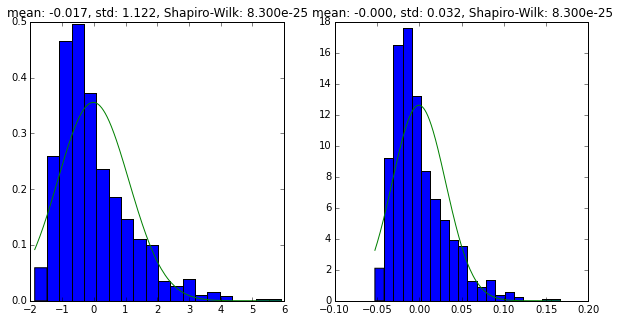

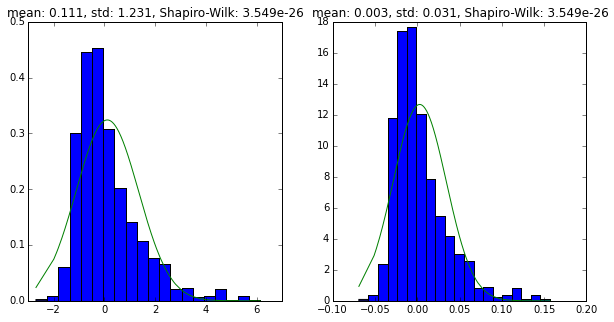

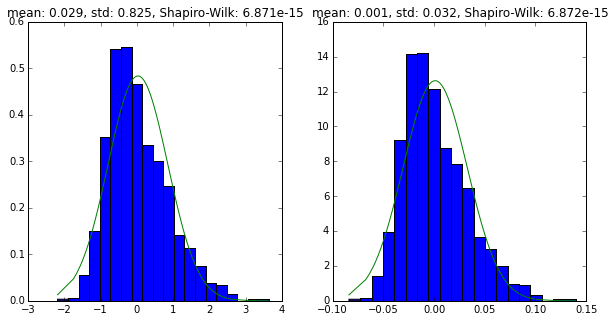

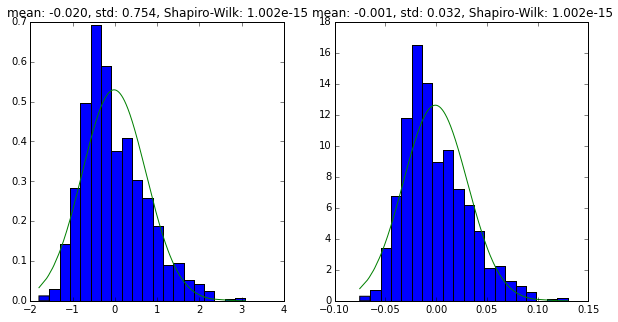

In [90]:
for i in [3,6,9,12]:
    sorted_z_scores = np.sort(z_scores[i])
    fit = scipy.stats.norm.pdf(sorted_z_scores, np.mean(sorted_z_scores), np.std(sorted_z_scores))
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.hist(sorted_z_scores, bins=20, normed=True)
    ax1.plot(sorted_z_scores, fit)
    ax1.set_title("mean: %.3f, std: %.3f, Shapiro-Wilk: %.3e" % (np.mean(sorted_z_scores), np.std(sorted_z_scores), scipy.stats.shapiro(sorted_z_scores)[1]))
    normalized_features = np.sort(normalize(sorted_z_scores, norm="l2")[0])
    fit_normalized = scipy.stats.norm.pdf(normalized_features, np.mean(normalized_features), np.std(normalized_features))
    ax2.hist(normalized_features, bins=20, normed=True)
    ax2.plot(normalized_features, fit_normalized)
    ax2.set_title("mean: %.3f, std: %.3f, Shapiro-Wilk: %.3e" % (np.mean(normalized_features), np.std(normalized_features), scipy.stats.shapiro(normalized_features)[1]))
    f.show()